In [1]:
# EDA and data handling
import numpy as np 
import pandas as pd 
import pickle
from zipfile import ZipFile
import os
import matplotlib.pyplot as plt

# Modeling
import sklearn
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics

In [2]:
sklearn.__version__

'0.21.2'

In [3]:
movies = pd.read_csv('../data/tmdb_movie_plots.csv')
movies.shape

(3410, 22)

In [4]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,top_genre,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Action,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Adventure,2007


In [5]:
movies = movies[['title', 'overview', 'year', 'popularity', 'top_genre']].copy()

In [6]:
# remove unlabeled data
print(movies.shape)
movies=movies.dropna(how='any')
print(movies.shape)

(3410, 5)
(3409, 5)


In [7]:
# columns
movies.columns

Index(['title', 'overview', 'year', 'popularity', 'top_genre'], dtype='object')

### Preprocess text data

In [8]:
tvec = TfidfVectorizer(
#                        input='content', 
#                        encoding='utf-8', 
#                        decode_error='strict', 
                       strip_accents='unicode', 
                       lowercase=True, 
#                        preprocessor=None, 
#                        tokenizer=None, 
#                        analyzer='word', 
                       stop_words='english', 
#                        token_pattern='(?u)\\b\\w\\w+\\b', 
                       ngram_range=(1, 3), 
#                        max_df=1.0, 
#                        min_df=1, 
#                        max_features=None, 
#                        vocabulary=True, 
#                        binary=False, 
#                        dtype=<class 'numpy.int64'>, 
#                        norm='l2', 
#                        use_idf=True, 
#                        smooth_idf=True, 
#                        sublinear_tf=False
)

## Target

In [9]:
# check out the genres
movies['top_genre'].value_counts().head()

Drama        826
Comedy       789
Action       513
Horror       214
Adventure    212
Name: top_genre, dtype: int64

In [10]:
# create the target variable
choice='Horror'
movies['target']=0
movies.loc[movies['top_genre']==choice, 'target']=1
movies['target'].value_counts().sort_index()

0    3195
1     214
Name: target, dtype: int64

In [11]:
# examine a few
movies[movies['target']==1].sample(3)

,title,overview,year,popularity,top_genre,target
2833,Chain Letter,Six friends receive a mysterious chain letter ...,2010,2.504156,Horror,1
2324,Severance,"Members (Danny Dyer, Laura Harris, Tim McInner...",2006,12.898984,Horror,1
2146,Stir of Echoes,"After being hypnotized by his sister in law, T...",1999,6.044161,Horror,1


## Train-test split

In [12]:
np.random.seed(42) 
msk = np.random.rand(len(movies)) < 0.8
train = movies[msk]
test = movies[~msk]
print(len(train))
print(len(test))

2729
680


In [13]:
# Oversample the target class
print(train['target'].value_counts())

0    2570
1     159
Name: target, dtype: int64


In [14]:
# Oversample the target class
targets = train[train['target']==1].sample(100, random_state=42)
train_aug=train.append(targets)
train_aug['target'].value_counts()

0    2570
1     259
Name: target, dtype: int64

In [15]:
# split into X and y
X_train=train_aug['overview']
X_test=test['overview']
y_train=train_aug['target']
y_test=test['target']

In [16]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

2829
2829
680
680


In [17]:
# Note the difference in train and test. Don't fit on the test data! (d'oh)
tvec.fit(X_train)
Xvec_train = tvec.transform(X_train)
Xvec_test  = tvec.transform(X_test)
# We pickle tvec later on.

In [18]:
# # grid search parameters
# param_grid = {
# #         'n_estimators': [100, 'warn'], 
# #         'max_depth': [3, 4, 5, None],
# #         'min_samples_split': [2, 3, 4, 5],
# #         'min_samples_leaf': [1, 2, 3, 4, 5],         
# #         'max_features': [5, 10, 15, 'auto'], 
# #         'class_weight': [None],
# #         'criterion':['entropy', 'gini'],
#         }

In [19]:
# # conduct gridsearch
# grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, n_jobs = 1, cv=3, verbose=False)
# grid.fit(Xvec_train, y_train)
# print(grid.best_params_)

In [20]:
# # Instantiate model using those parameters
# my_model = grid.best_estimator_
# print(my_model)
# Model parameters
# print(my_model.get_params)

In [21]:
my_model=RandomForestClassifier()
my_model.fit(Xvec_train, y_train)

//anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [22]:
# pickle the RF model
file = open(f'trained_rf_model.pkl', 'wb')
pickle.dump(my_model, file)
file.close()

In [23]:
# writing files to a zipfile 
with ZipFile('model.zip','w') as zip: 
    zip.write('trained_rf_model.pkl') 

In [24]:
# remove the pickle file after zipping it.
os.remove('trained_rf_model.pkl')

## Predict & Evaluate

In [25]:
# Predict on the test data
y_preds=my_model.predict(Xvec_test)
print(len(y_test))
len(y_preds)

680


680

In [26]:
# Probabilities
y_probs = my_model.predict_proba(Xvec_test)[:,1]
len(y_probs)

680

In [27]:
# Accuracy score
metrics.accuracy_score(y_test, y_preds)

0.9191176470588235

In [28]:
# precision and recall 
print(metrics.classification_report(y_test, y_preds))

//anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.92      1.00      0.96       625
           1       0.00      0.00      0.00        55

    accuracy                           0.92       680
   macro avg       0.46      0.50      0.48       680
weighted avg       0.84      0.92      0.88       680



In [29]:
# confusion matrix
cm = metrics.confusion_matrix(y_test, y_preds)
pd.DataFrame(cm, columns=['pred_0', 'pred_1'])

,pred_0,pred_1
0,625,0
1,55,0


In [30]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_preds).ravel()
print(tn, fp, fn, tp)

625 0 55 0


## ROCAUC score

In [31]:
from sklearn.metrics import roc_curve, auc

In [32]:
FPR = dict()
TPR = dict()
ROC_AUC = dict()
# For class 1 (has WNV), find the area under the curve:
FPR[1], TPR[1], _ = roc_curve(y_test, y_probs)
ROC_AUC[1] = auc(FPR[1], TPR[1])

In [33]:
# What is that ROC-AUC score?
print(ROC_AUC[1])
# Same but using the scikit default:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_probs)

0.659869090909091


0.659869090909091

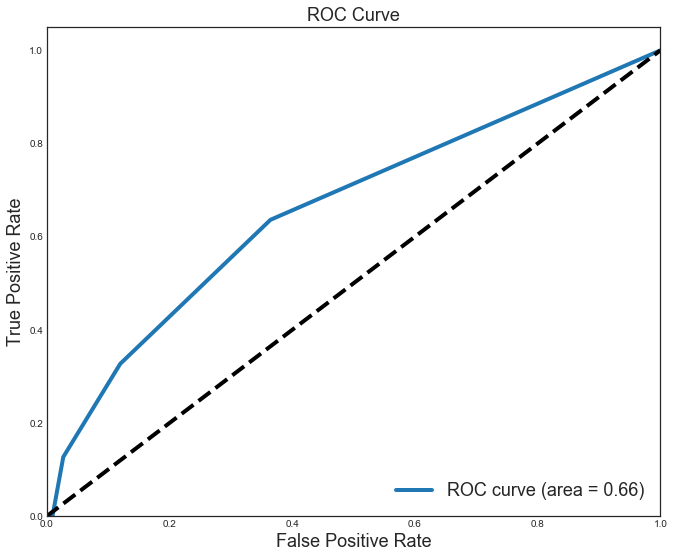

In [34]:
# Let's draw that:
plt.style.use('seaborn-white')
plt.figure(figsize=[11,9])
plt.plot(FPR[1], TPR[1], label='ROC curve (area = %0.2f)' % ROC_AUC[1], linewidth=4)
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('ROC Curve', fontsize=18)
plt.legend(loc="lower right", fontsize=18);

## Feature Importance

In [35]:
df_x  = pd.DataFrame(Xvec_test.todense(),
             columns=tvec.get_feature_names())

In [36]:
fi = pd.DataFrame({
        'feature':df_x.columns,
        'importance':my_model.feature_importances_
    })

fi.sort_values('importance', ascending=False, inplace=True)

In [37]:
# Features most associated with target
top15=pd.DataFrame(fi.sort_values('importance', ascending=False).head(15))
top15

,feature,importance
65141,house,0.006013
64769,horror,0.005426
65671,humans,0.004951
152564,zombie,0.004673
56095,ghost,0.004560
152565,zombie epidemic,0.003604
64706,horrific,0.003580
58847,group,0.003557
79952,live research ancient,0.003478
144564,virus,0.003086


Text(0, 0.5, 'Feature Importance')

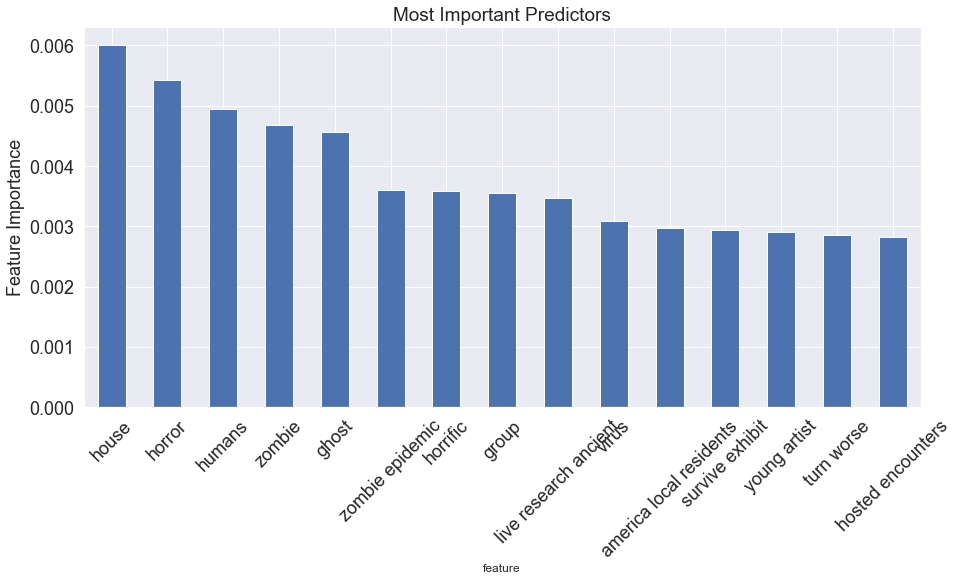

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="darkgrid", color_codes=None)
# sns.palplot(sns.color_palette("RdBu", n_colors=7))
ax = top15.set_index('feature').plot(kind='bar', legend=False, fontsize=18,  figsize=(15, 7))
plt.xticks(rotation = 45,  fontsize=18)
plt.title('Most Important Predictors',  fontsize=19)
plt.yticks(rotation = 0,  fontsize=18)
plt.ylabel('Feature Importance', rotation=90,  fontsize=18)

## Test on new data

In [39]:
# newdata = train[train['target']==1]['overview'].sample(1).values
newdata = ['this is a test this is just a test funny funny joke ha']
tvec_test=tvec.transform(newdata)
preds_test=my_model.predict(tvec_test)
preds_test

array([0])

In [40]:
# pickle the vectorizer
file = open('vectorizer.pkl', 'wb')
pickle.dump(tvec, file)
file.close()

In [41]:
# write files to a zipfile 
with ZipFile('vectorizer.zip','w') as zip: 
    zip.write('vectorizer.pkl') 

In [42]:
# open the pickled word vector file
file = open('vectorizer.pkl', 'rb')
tvec_pkl=pickle.load(file)
file.close()

In [43]:
# predict on new data
tvec_test=tvec_pkl.transform(newdata)
preds_test=my_model.predict(tvec_test)
preds_test

array([0])

In [44]:
# cleanup
os.remove('vectorizer.pkl')